# Step-by-Step Guide: Predicting House Prices (Regression)

## 1-import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


## 2-load data

In [2]:
#load data
df=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')

#display sample of data
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


As we can see we have 80 features and one target 

## 3-EDA 

to understand the distribution of features, handle missing values, and identify correlations.

In [3]:
#info to check is there categorical data or missing at all
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

we have cat data and null!

In [4]:
# Summary statistics
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


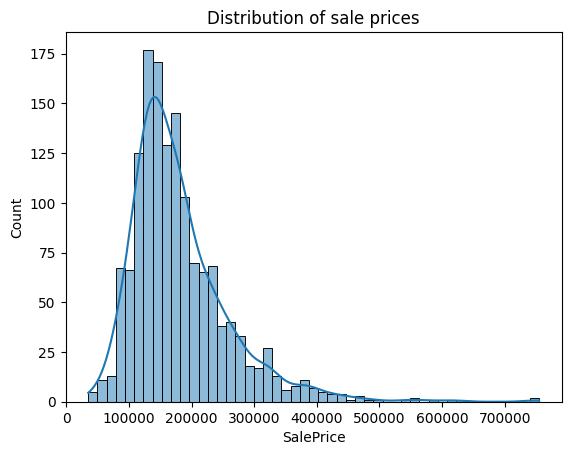

In [5]:
# Visualize the distribution of the target variable (SalePrice)
sns.histplot(df.SalePrice,kde=True)
plt.title('Distribution of sale prices')
plt.show()

positive skwness where mean>median>mode
https://www.scribbr.com/statistics/skewness/#:~:text=A%20left-skewed%20distribution

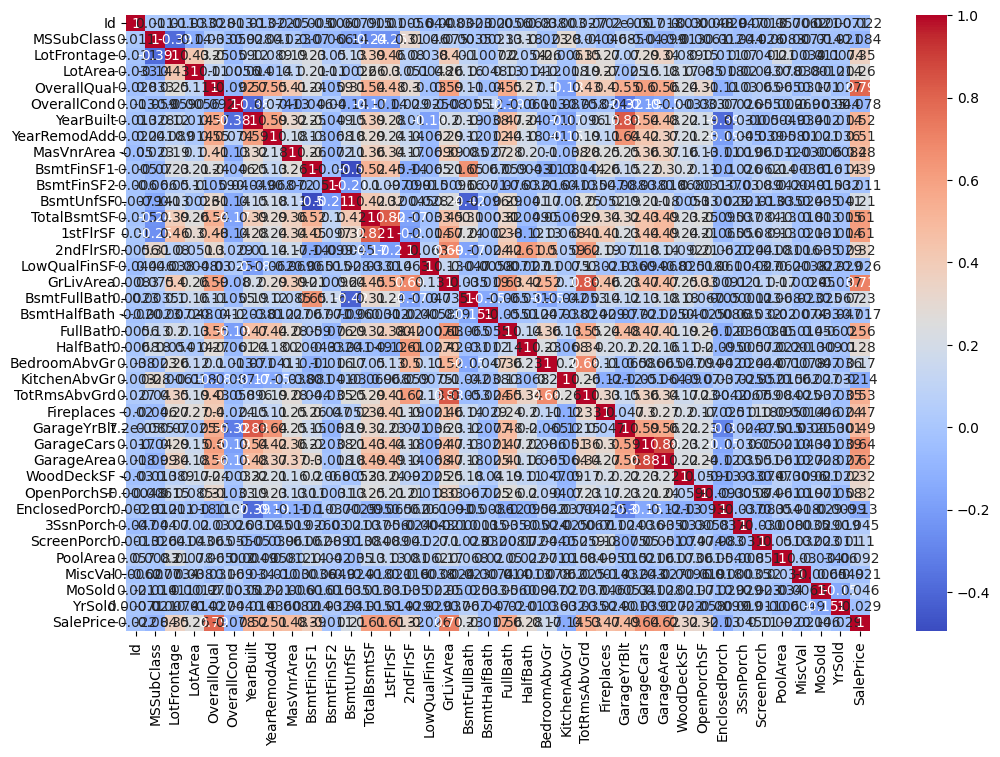

In [6]:
# correlation heatmap to know best features, and if there are two features 
# with same meaning so take only one of them.

# But firstly must split data to numerical and categorical to make correlation
categorical_columns=df.select_dtypes(['object'])
numaric_columns=df.select_dtypes(['int64','float64'])

# Then
plt.figure(figsize=(12,8))
sns.heatmap(numaric_columns.corr(),annot=True,cmap='coolwarm')
plt.show('correlation heatmap')
plt.show()

There are good correlation between features to target.
Our mission here to know feature with same meaning to remove all except one,that in preprocessing Step

In [7]:
categorical_columns

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [8]:
print('numercal feature shape',numaric_columns.shape,'\ncategorical feature shape',categorical_columns.shape)

numercal feature shape (1460, 38) 
categorical feature shape (1460, 43)


Id


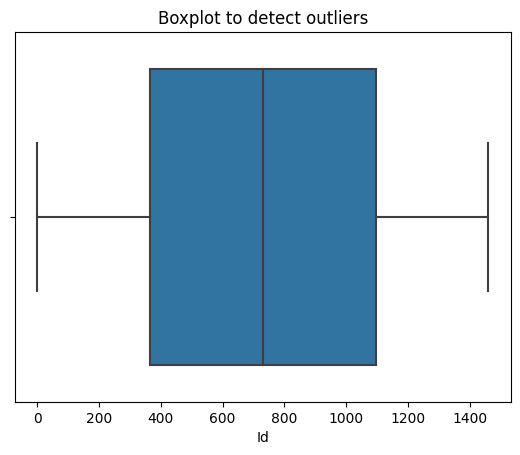

MSSubClass


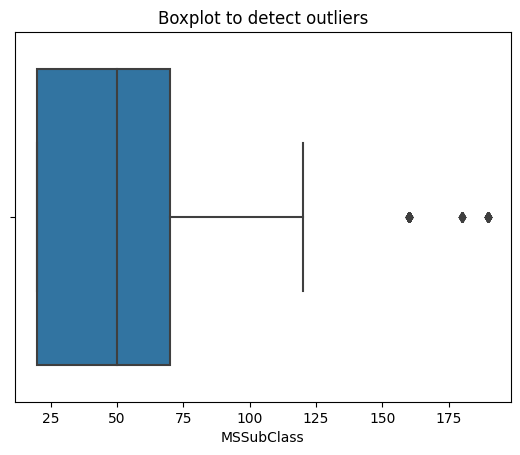

LotFrontage


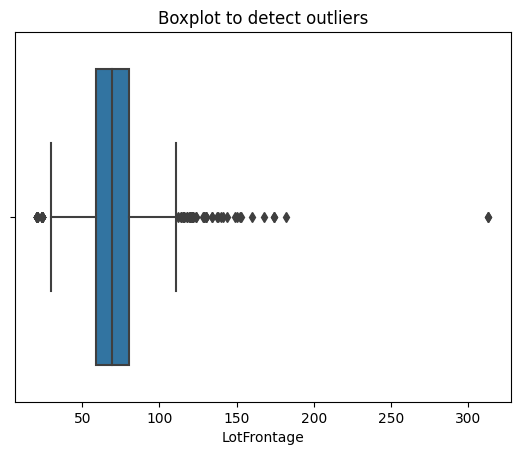

LotArea


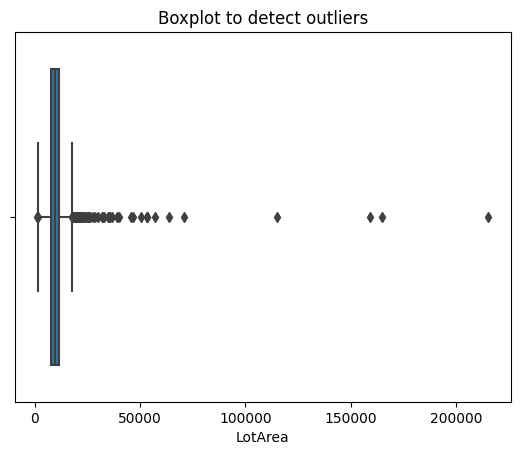

OverallQual


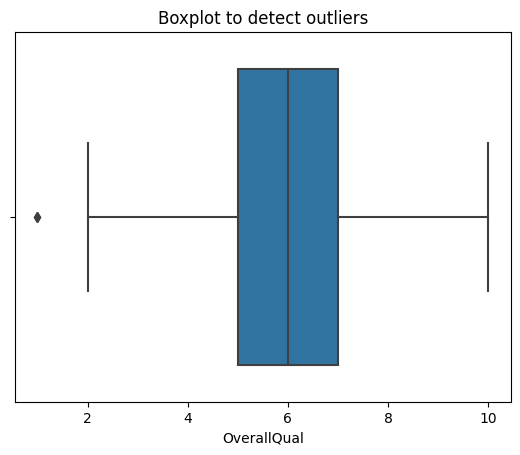

OverallCond


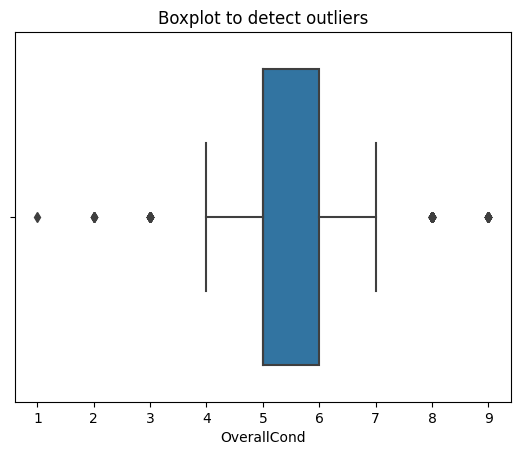

YearBuilt


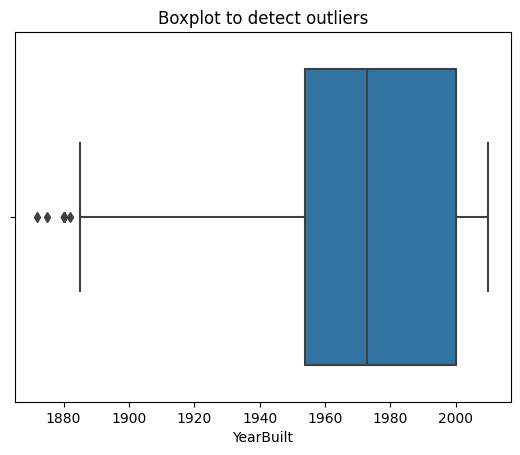

YearRemodAdd


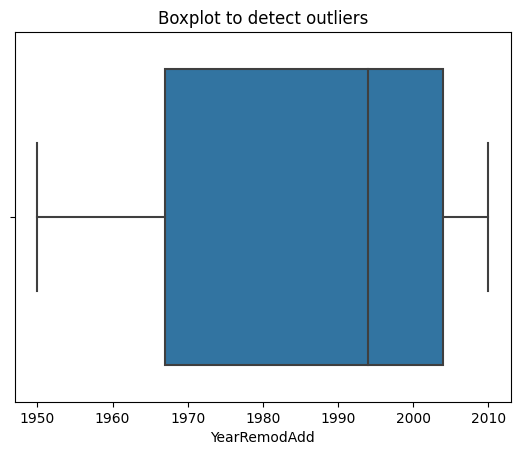

MasVnrArea


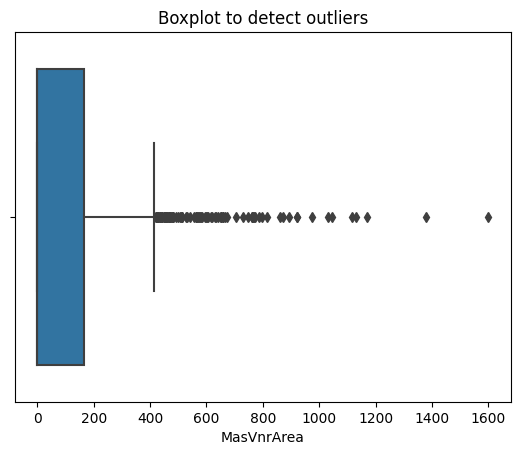

BsmtFinSF1


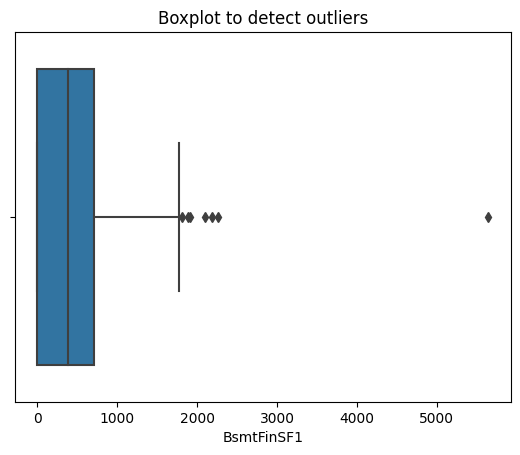

BsmtFinSF2


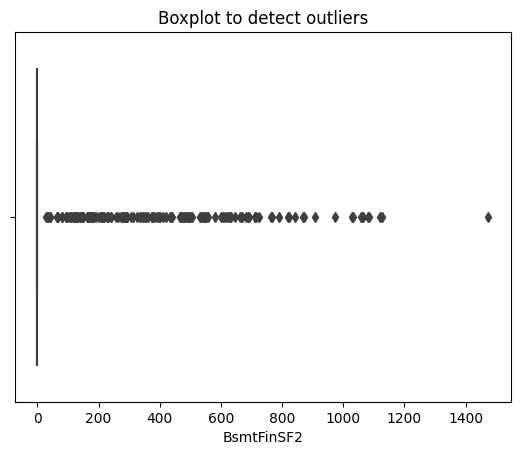

BsmtUnfSF


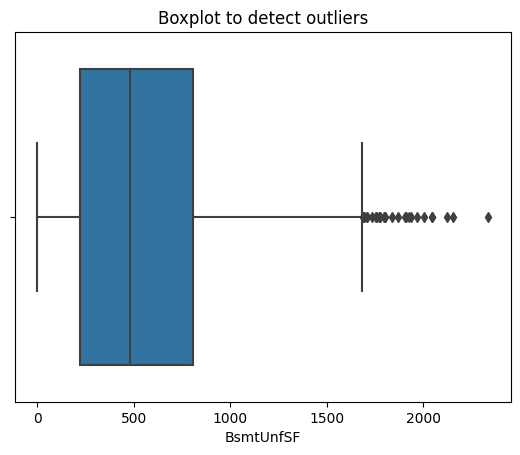

TotalBsmtSF


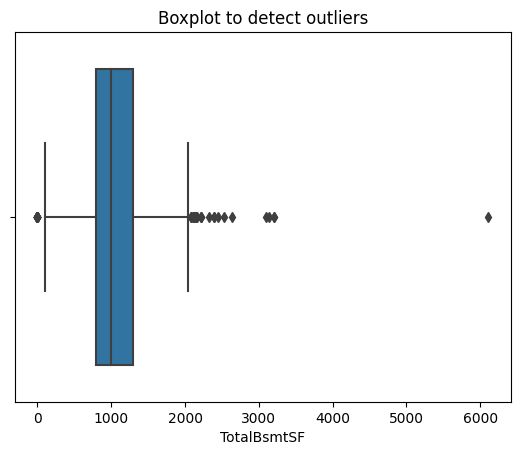

1stFlrSF


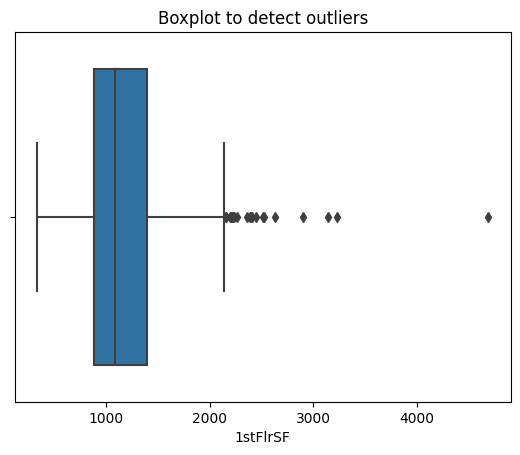

2ndFlrSF


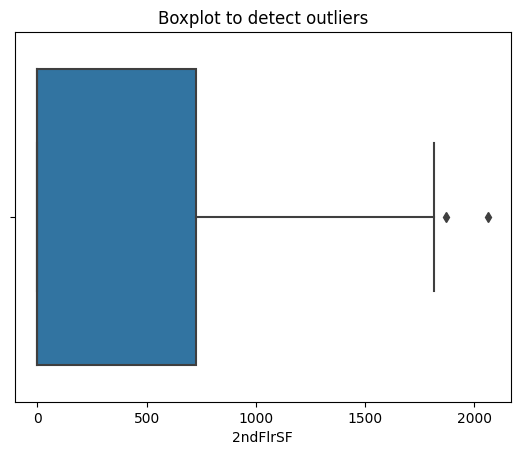

LowQualFinSF


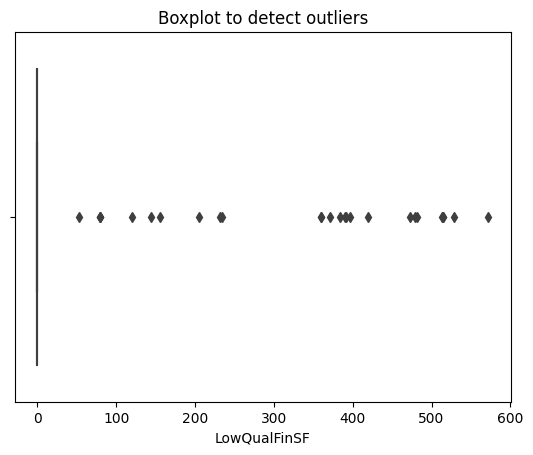

GrLivArea


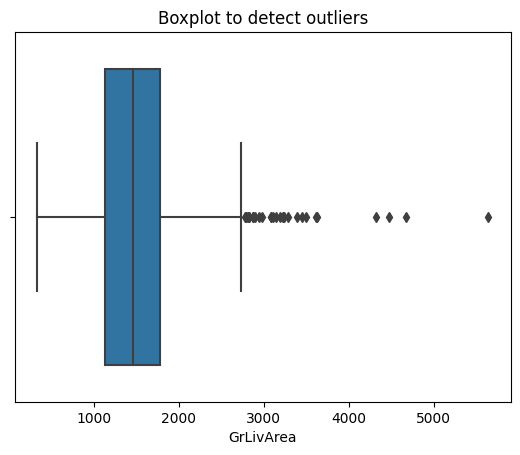

BsmtFullBath


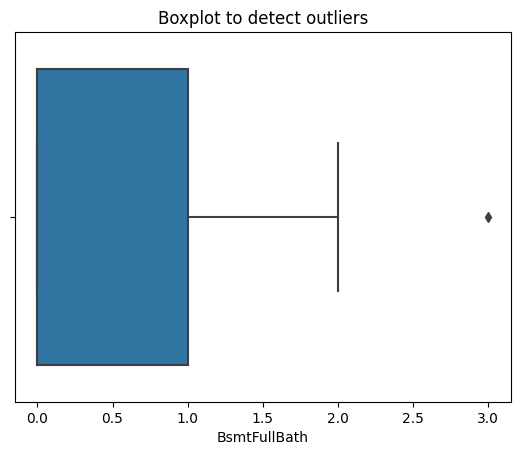

BsmtHalfBath


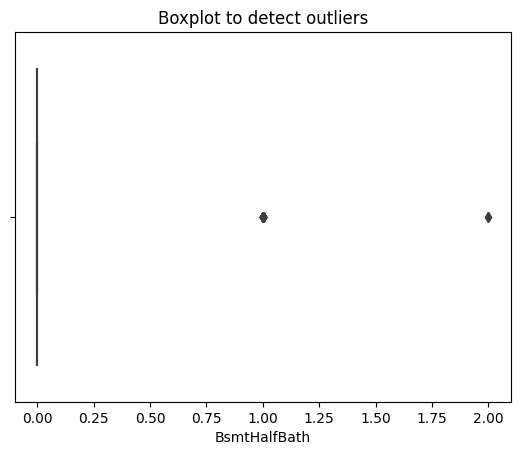

FullBath


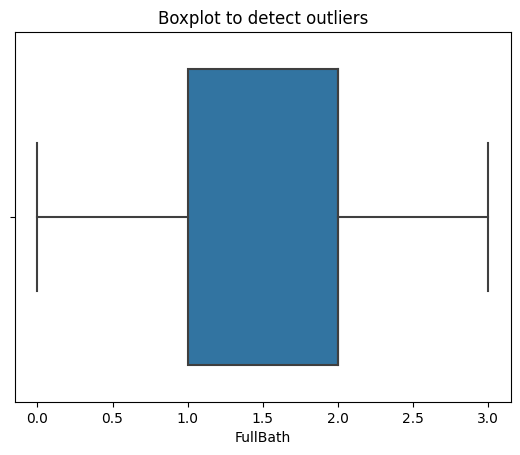

HalfBath


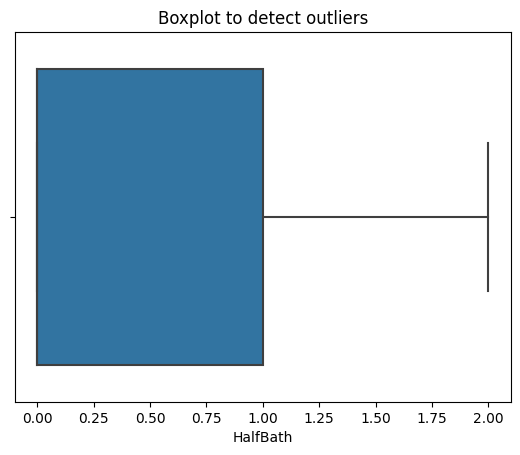

BedroomAbvGr


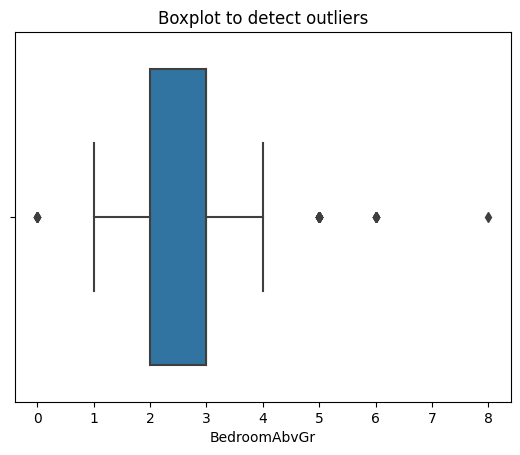

KitchenAbvGr


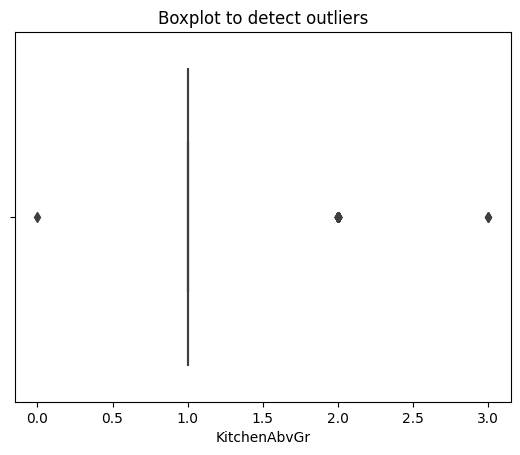

TotRmsAbvGrd


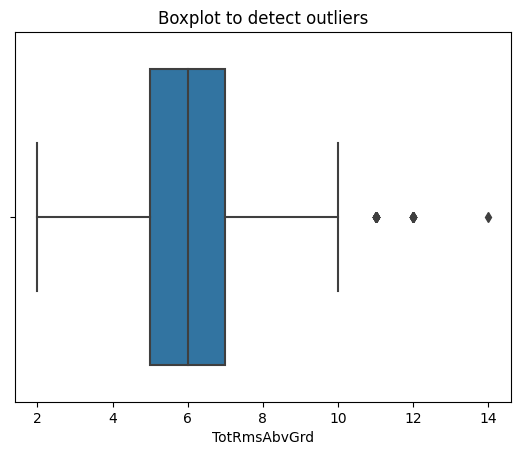

Fireplaces


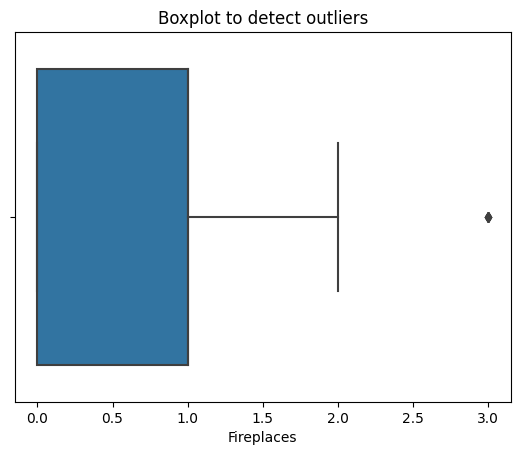

GarageYrBlt


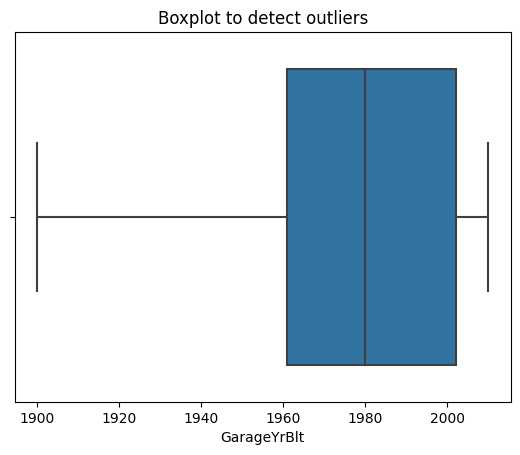

GarageCars


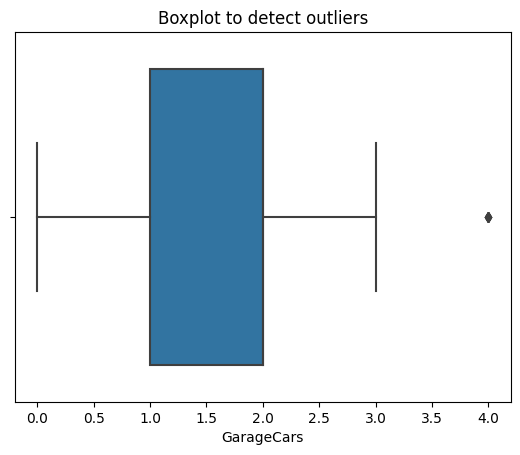

GarageArea


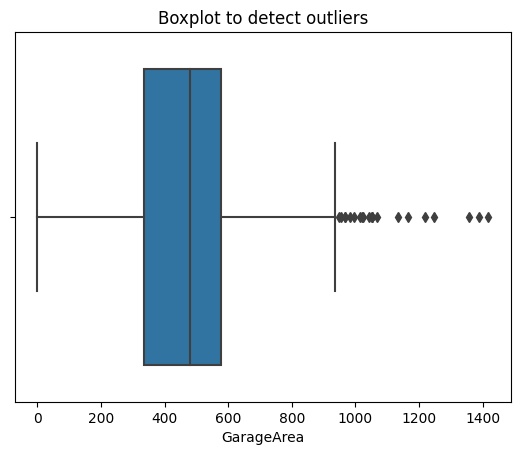

WoodDeckSF


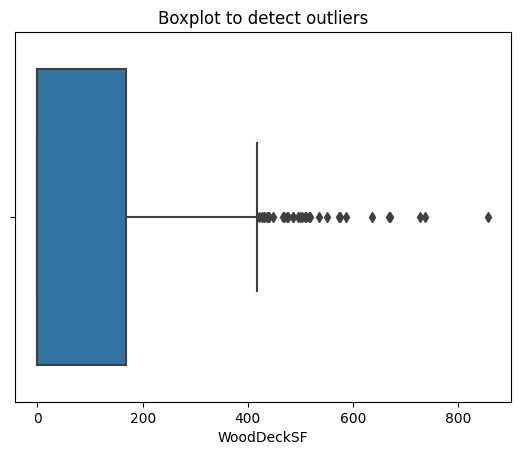

OpenPorchSF


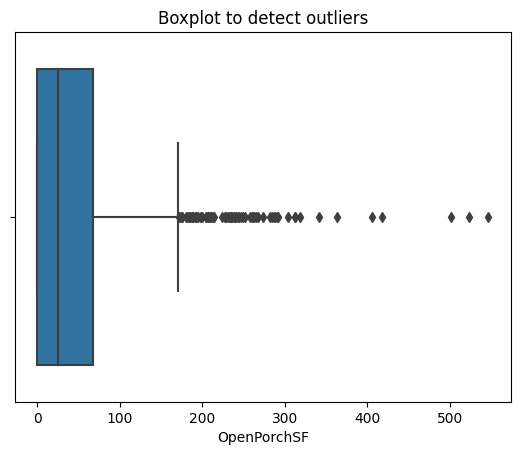

EnclosedPorch


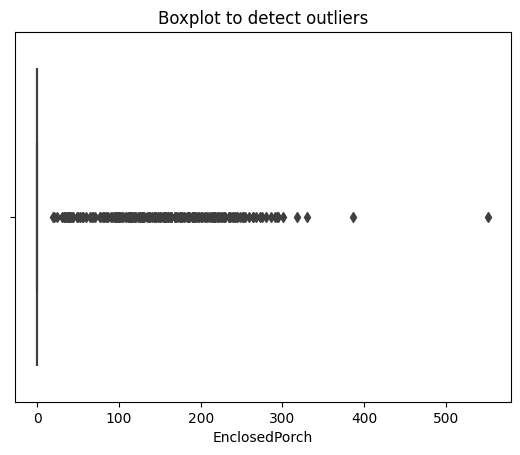

3SsnPorch


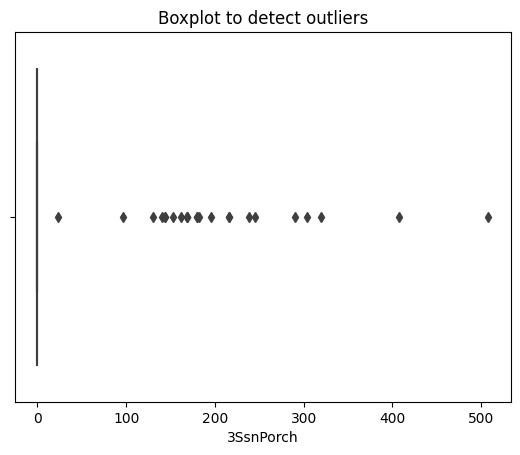

ScreenPorch


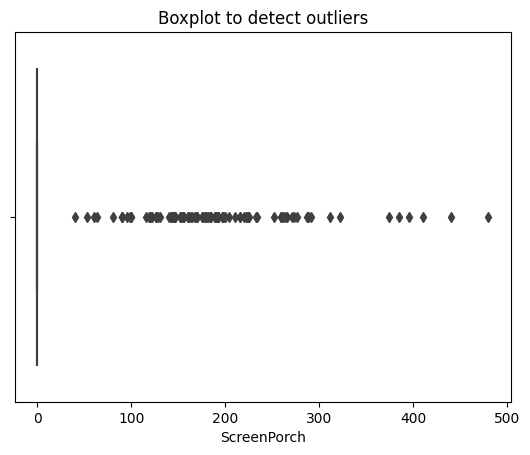

PoolArea


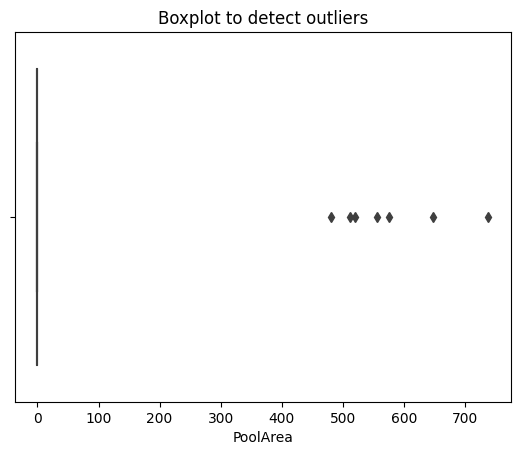

MiscVal


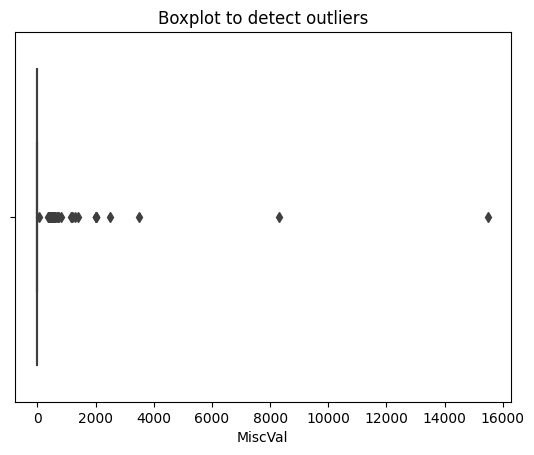

MoSold


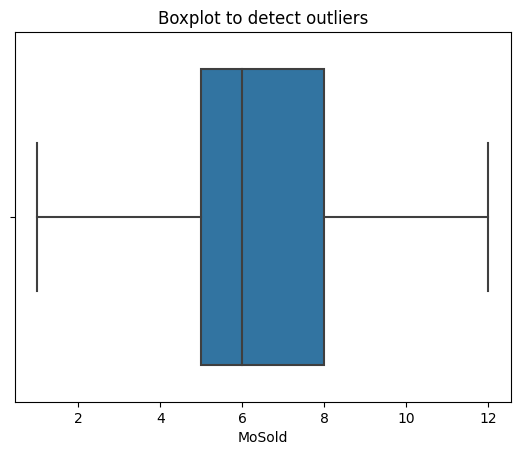

YrSold


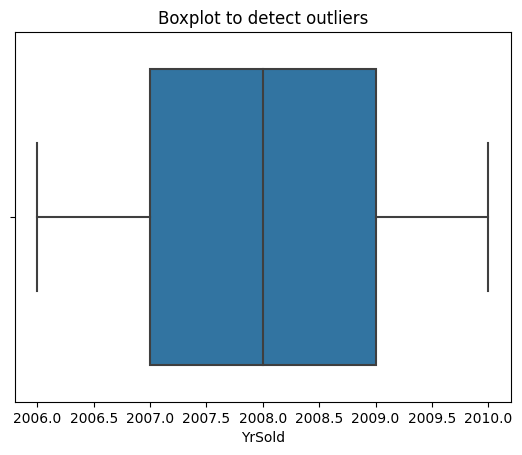

SalePrice


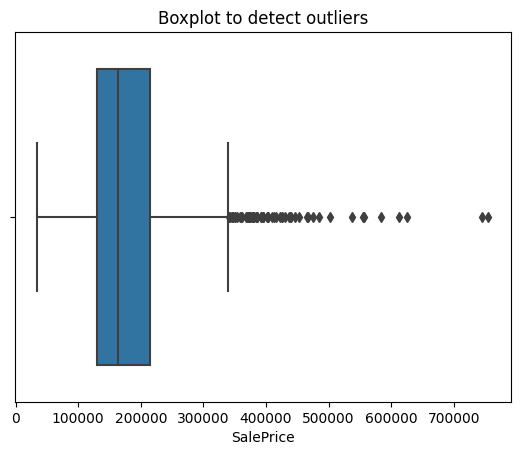

In [9]:
# Detecting outliers  in features
for i in numaric_columns.columns:
    print(i)
    sns.boxplot(x=df[str(i)])
    plt.title("Boxplot to detect outliers")
    plt.show()

Okay,we have outliers in almost of my data.

## 4-Data preprocessing

Our mission here now is gradually to deleate outlairs then deal with NAN then make encoding to Cat feature then feature selection then make feature scaling.

5 steps.

### 4-1 outliers

In [10]:
# 4-1
# Define a function to calculate IQR and remove outliers

numerical_cols = df.select_dtypes(include=[np.number]).columns
categorical_cols = df.select_dtypes(include=[object]).columns

df_numerical = df[numerical_cols]
df_categorical = df[categorical_cols]

def remove_outliers_iqr(df):
    Q1 = df.quantile(0.01)
    Q3 = df.quantile(0.99)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    non_outliers_mask = ~((df < lower_bound) | (df > upper_bound)).any(axis=1)
    
    return df[non_outliers_mask]

# Get the mask for non-outliers
non_outliers_mask = remove_outliers_iqr(df_numerical)
x=[i for i in non_outliers_mask.index]
x
# Apply the mask to both numerical and categorical data
df_numerical_clean = df_numerical.loc[x]
df_categorical_clean = df_categorical.loc[x]


# Recombine the cleaned numerical data with the categorical data
df_clean = pd.concat([df_numerical_clean, df_categorical_clean], axis=1)



In [11]:
df_clean

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1455,20,62.0,7500,7,5,2004,2005,0.0,410,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


Amazing!

### 4-2 NAN

In [12]:
# 4-2
# Seeing if missing data more than 10% of rows so remove feature, else Impute.

null_feature_removed=[]
for i in df_clean.columns:
    item = str(i)
    if df_clean[item].isnull().sum()/1460 >=0.1:
        df_clean=df_clean.drop(i,axis=1)
        null_feature_removed.append(item)

null_feature_removed


['LotFrontage',
 'Alley',
 'MasVnrType',
 'FireplaceQu',
 'PoolQC',
 'Fence',
 'MiscFeature']

So these features removed from my data.

In [13]:
# Then impute if there are nulls again
df_clean.isnull().sum().sort_values(ascending=False)

GarageCond       80
GarageQual       80
GarageFinish     80
GarageType       80
GarageYrBlt      80
                 ..
GarageCars        0
Fireplaces        0
TotRmsAbvGrd      0
KitchenAbvGr      0
SaleCondition     0
Length: 74, dtype: int64

So there are nulls in features but are few so we will impute them

In [14]:
# Fill missing values with mode for each column
df_clean = df_clean.apply(lambda col: col.fillna(col.mode()[0]) if col.isna().any() else col)
df_clean.isnull().sum().sort_values()

#df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

Id               0
Exterior2nd      0
Exterior1st      0
RoofMatl         0
RoofStyle        0
                ..
TotRmsAbvGrd     0
KitchenAbvGr     0
BedroomAbvGr     0
FullBath         0
SaleCondition    0
Length: 74, dtype: int64

perfect!

### 4-3 Encode

In [15]:
# 4-3
# Encoding Categorical Features

# One-hot encoding for categorical features
df_clean = pd.get_dummies(df_clean)


### 4-4 Feature selection

In [16]:
# Separate features and target variable
X = df_clean.drop(['SalePrice','Id'], axis=1)
y = df_clean['SalePrice']

In [17]:
# Feature selection

# Fit model
clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X, y)
 
# Transform the model
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)
X_new.shape

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


(1441, 83)

In [18]:
# Split into training and testing sets
X_train , X_test , y_train , y_test = train_test_split(X_new,y,test_size=0.2,random_state=42)


In [19]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Doneeee!

## Model & Evaluation

We Have four model to fit which are LR , TREE and RF.

In [20]:
# Let's began with LR

# Initialize the model
LR = LinearRegression()
LR.fit(X_train,y_train)

# Make predict
y_pred = LR.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

print()

Mean Squared Error: 692924524.66
R-squared: 0.87



In [21]:
# Tree
# Initialize and train the model
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 1320759501.82
R-squared: 0.75


In [22]:
# Initialize and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 713708825.48
R-squared: 0.86
